In [1]:
import pandas as pd

datos = pd.read_csv("U4_04_train.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

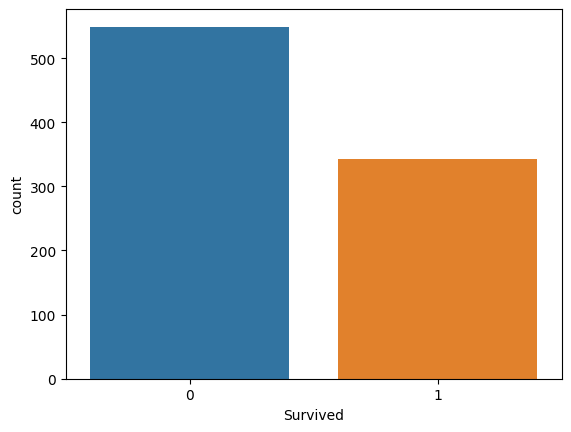

In [4]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

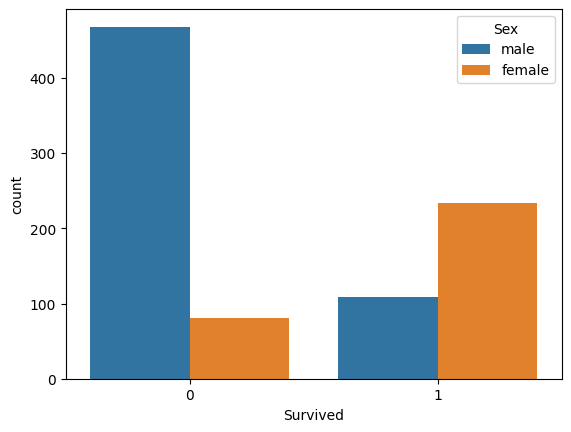

In [5]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [6]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

h:\Proyectos\JupEnv\JpEnv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


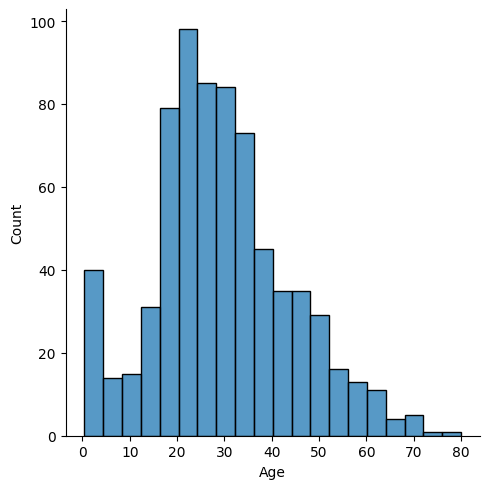

In [7]:
sb.displot(x="Age",data=datos)

In [8]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
datos["Age"].mean()

29.69911764705882

In [10]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
datos["Age"]=datos["Age"].fillna(datos["Age"].mean())

In [12]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
datos = datos.drop(["Cabin"], axis=1)

In [14]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
datos = datos.dropna()

In [16]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
datos = datos.drop(["Name","PassengerId","Ticket"], axis=1)

In [18]:
dummies_sex = pd.get_dummies(datos["Sex"],drop_first=True,dtype=int)

In [19]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"],axis=1)

<Axes: xlabel='Survived', ylabel='count'>

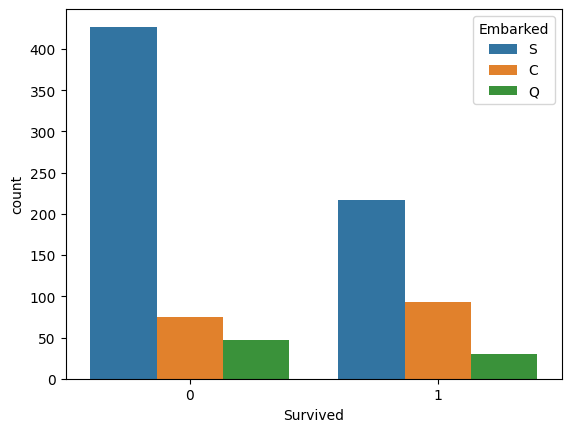

In [20]:
sb.countplot(x="Survived",data=datos, hue="Embarked")

In [21]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True,dtype=int)

In [22]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

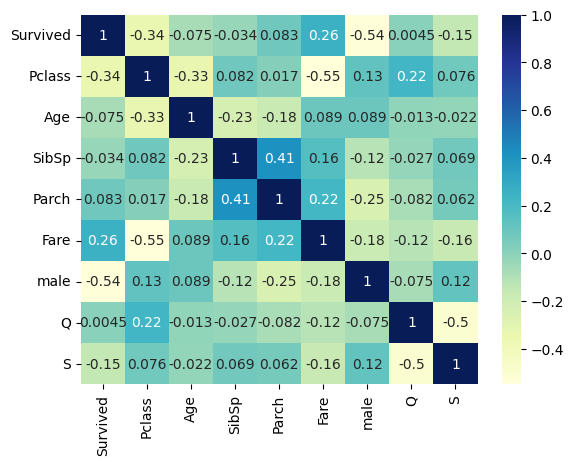

In [23]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

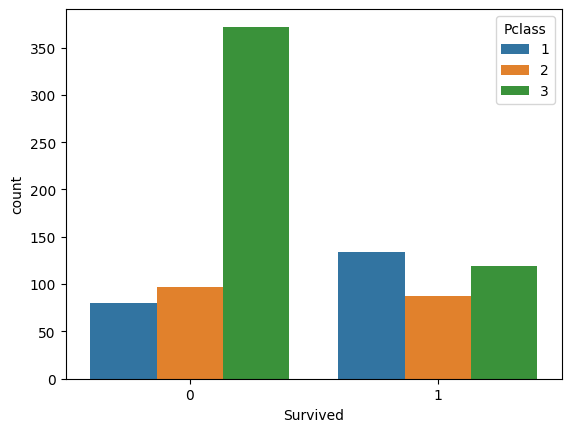

In [24]:
sb.countplot(x="Survived",data=datos,hue="Pclass")

In [25]:
x = datos.drop(["Survived"],axis=1)
y = datos["Survived"]

In [26]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, Y_ent, Y_pru = train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent,Y_ent)
predicciones = modelo.predict(X_pru)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pru, predicciones)

0.7752808988764045

In [37]:
from sklearn.tree import DecisionTreeClassifier
resultados=[]
for i in range(1,15):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent,Y_ent)
    predicciones = modelo.predict(X_pru)
    exactitud = accuracy_score(Y_pru, predicciones)
    print(f'Resultado para {i}: {exactitud}')
    resultados.append(exactitud)

Resultado para 1: 0.7696629213483146
Resultado para 2: 0.7640449438202247
Resultado para 3: 0.7865168539325843
Resultado para 4: 0.7865168539325843
Resultado para 5: 0.8089887640449438
Resultado para 6: 0.8314606741573034
Resultado para 7: 0.8258426966292135
Resultado para 8: 0.8033707865168539
Resultado para 9: 0.797752808988764
Resultado para 10: 0.797752808988764
Resultado para 11: 0.7808988764044944
Resultado para 12: 0.7808988764044944
Resultado para 13: 0.7808988764044944
Resultado para 14: 0.7921348314606742


<Axes: >

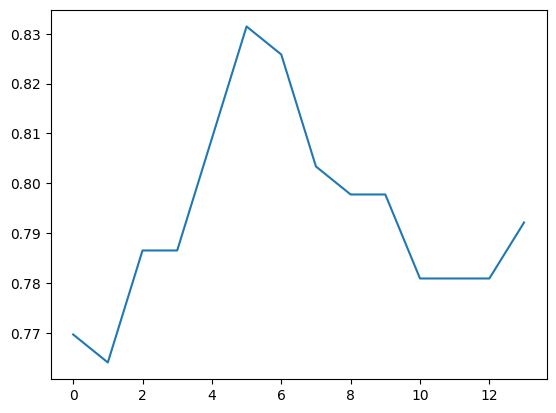

In [38]:
sb.lineplot(data=resultados)

In [40]:
modelo = DecisionTreeClassifier(max_depth=6)
modelo.fit(X_ent,Y_ent)
predicciones = modelo.predict(X_pru)
accuracy_score(Y_pru, predicciones)

0.8258426966292135

In [41]:
from sklearn.metrics import classification_report

print(classification_report(Y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       104
           1       0.88      0.68      0.76        74

    accuracy                           0.83       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



In [42]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(Y_pru, predicciones), columns = ["Pred: No","Pred: Sí"],index=["Real: No","Real: Si"])

,Pred: No,Pred: Sí
Real: No,97,7
Real: Si,24,50


In [47]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [49]:
from sklearn.tree import plot_tree


[Text(0.4925, 0.9285714285714286, 'male <= 0.5\n0.468\n711\n[445, 266]\nMurió'),
 Text(0.2375, 0.7857142857142857, 'Pclass <= 2.5\n0.386\n245\n[64, 181]\nVivió'),
 Text(0.09, 0.6428571428571429, 'Age <= 2.5\n0.112\n134\n[8, 126]\nVivió'),
 Text(0.04, 0.5, 'Pclass <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.02, 0.35714285714285715, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.06, 0.35714285714285715, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.14, 0.5, 'Fare <= 28.856\n0.1\n132\n[7, 125]\nVivió'),
 Text(0.1, 0.35714285714285715, 'Fare <= 28.231\n0.194\n55\n[6, 49]\nVivió'),
 Text(0.08, 0.21428571428571427, 'Age <= 23.5\n0.168\n54\n[5, 49]\nVivió'),
 Text(0.06, 0.07142857142857142, '0.0\n12\n[0, 12]\nVivió'),
 Text(0.1, 0.07142857142857142, '0.21\n42\n[5, 37]\nVivió'),
 Text(0.12, 0.21428571428571427, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.18, 0.35714285714285715, 'Parch <= 1.5\n0.026\n77\n[1, 76]\nVivió'),
 Text(0.16, 0.21428571428571427, '0.0\n65\n[0, 65]\nVivió'),
 Text(0.2, 0.21428571428571427, 'Fare <= 135.775\

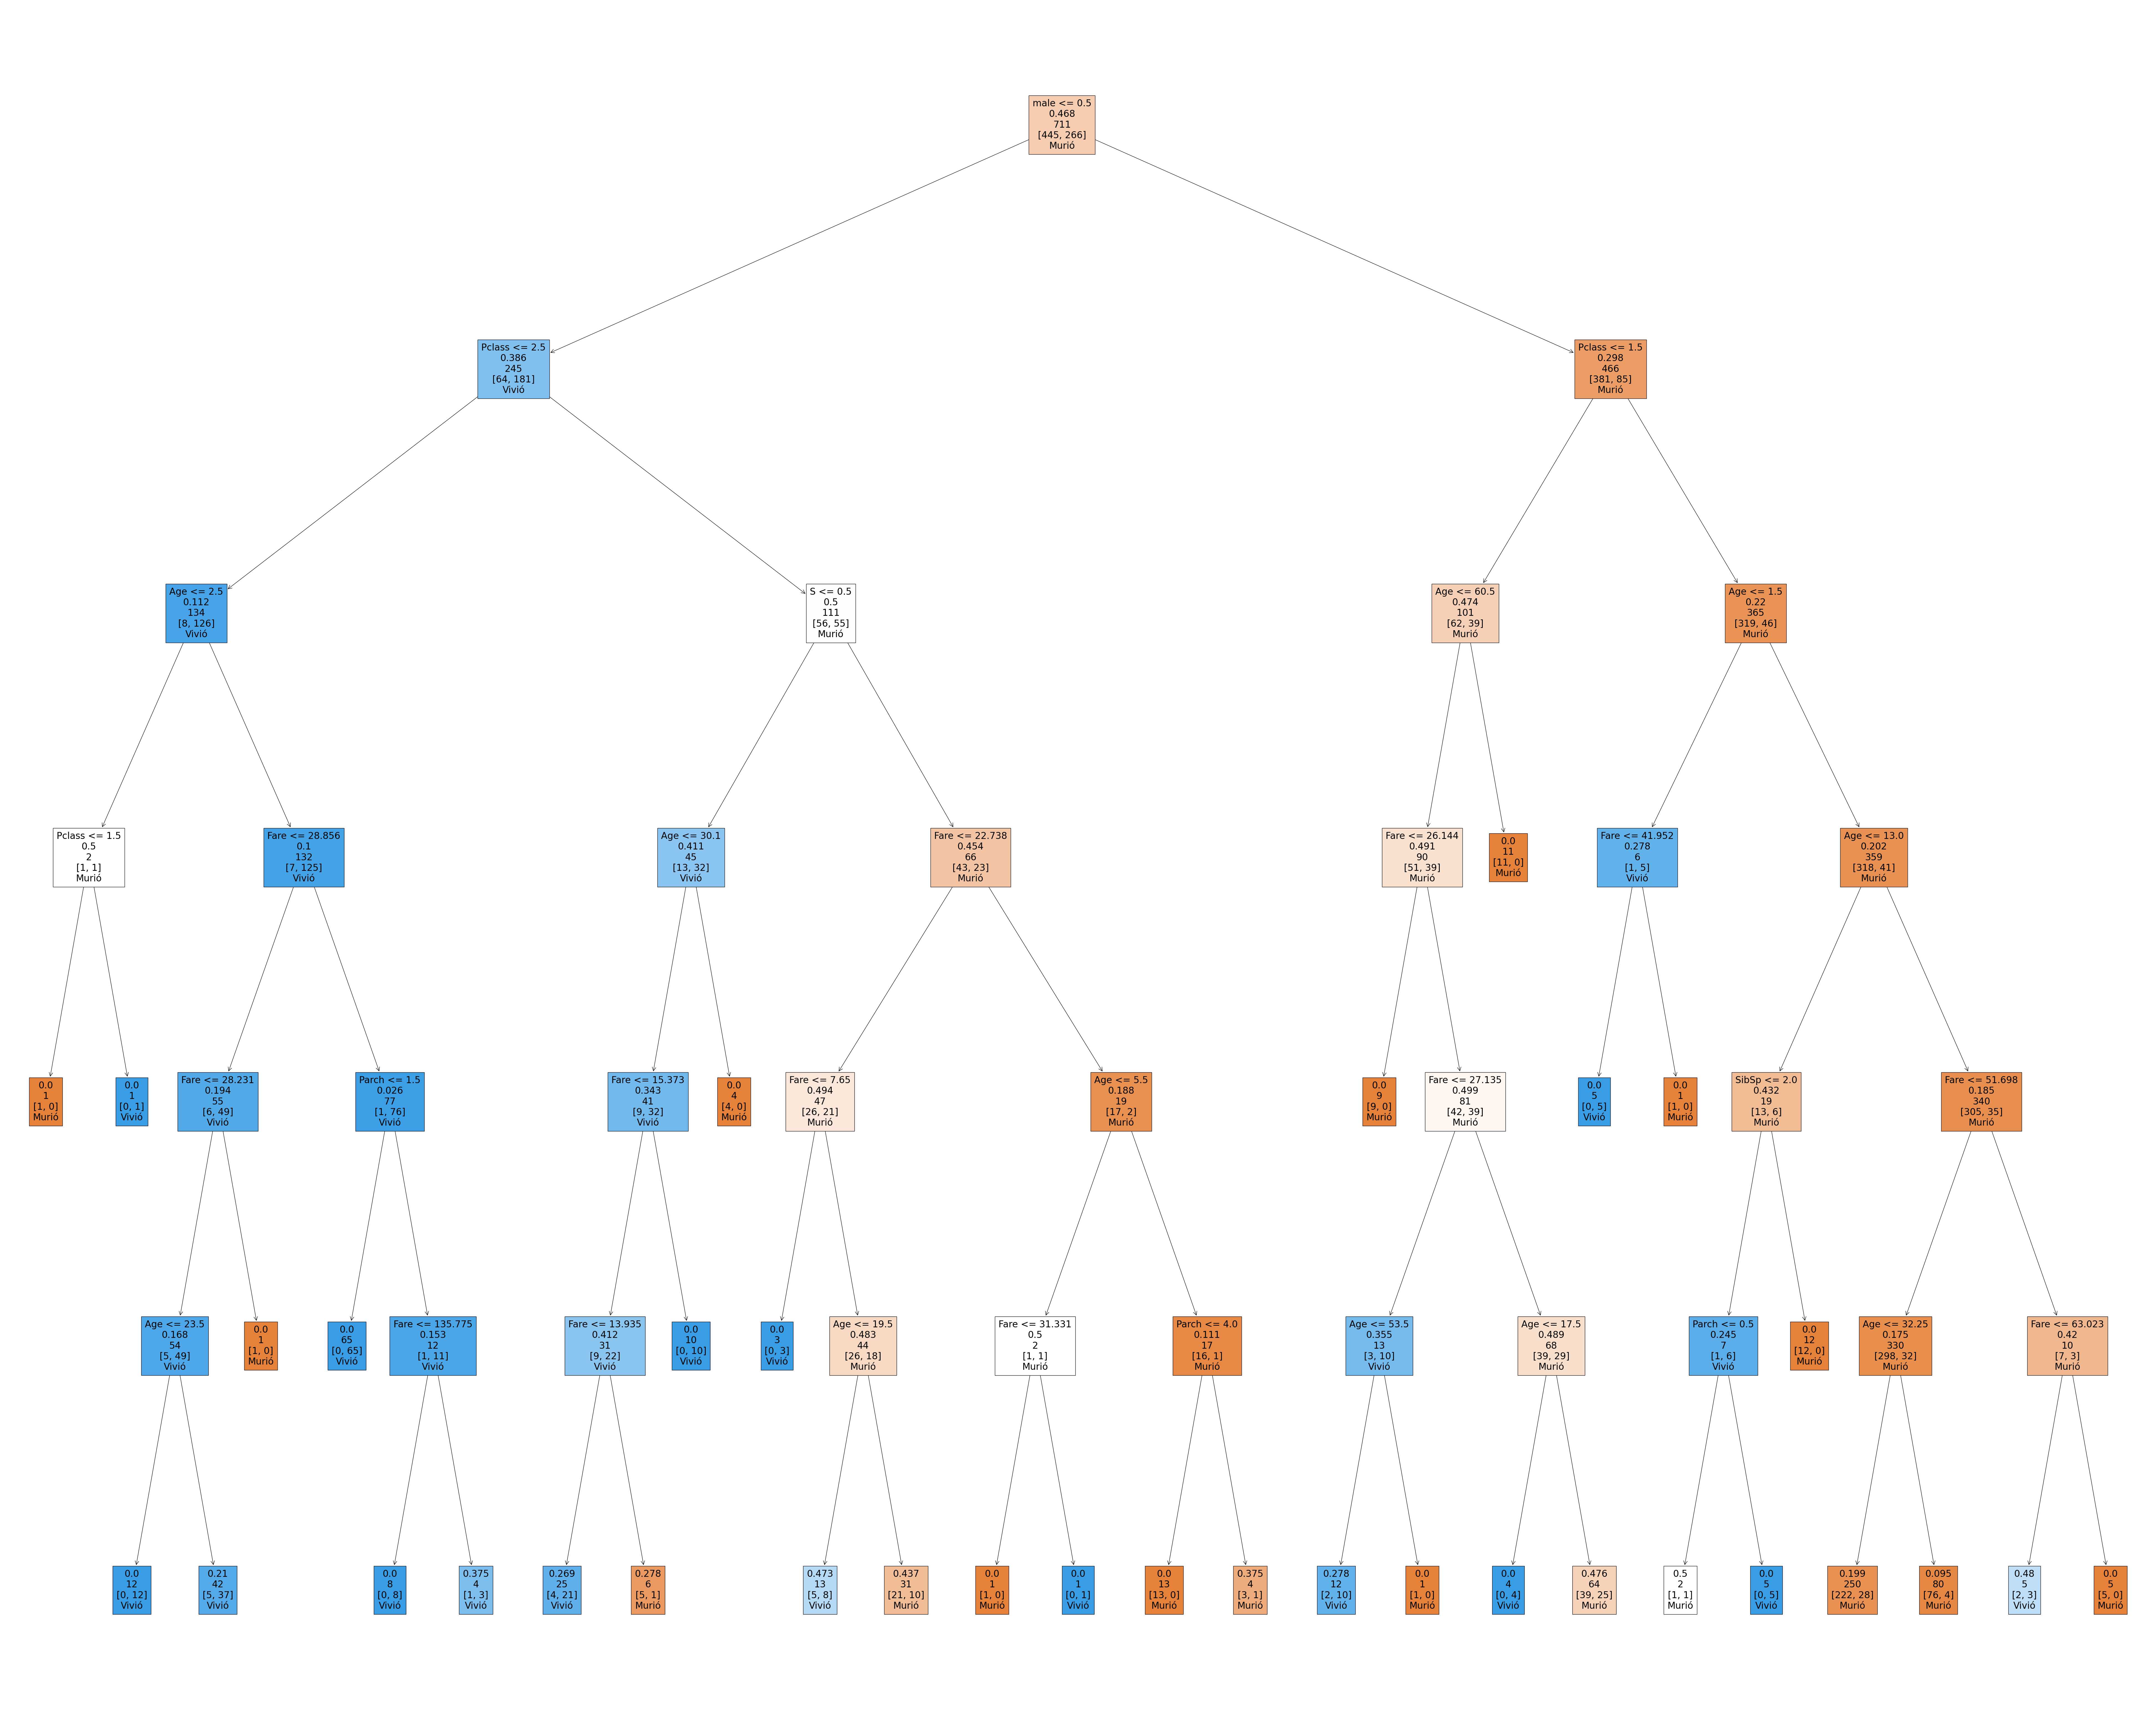

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=list(X_ent.columns),
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       111
           1       0.87      0.69      0.77        67

    accuracy                           0.84       178
   macro avg       0.85      0.81      0.82       178
weighted avg       0.85      0.84      0.84       178



In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_pru, predicciones)

array([[104,   7],
       [ 21,  46]], dtype=int64)

In [ ]:
pd.DataFrame(confusion_matrix(Y_pru, predicciones), columns = ["Pred: No","Pred: Sí"],index=["Real: No","Real: Si"])

,Pred: No,Pred: Sí
Real: No,104,7
Real: Si,21,46


In [ ]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
nueva_persona = [3,35,0,0,69,0,0,0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
    print("Sobreviviste")
else:
    print("No sobreviviste")

Sobreviviste


h:\Proyectos\JupEnv\JpEnv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
